In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('HR_comma_sep.csv', index_col=None)

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df = df.rename(columns={'satisfaction_level': 'satisfaction',
'last_evaluation': 'evaluation',
'number_project': 'projectCount',
'average_montly_hours': 'averageMonthlyHours',
'time_spend_company': 'yearsAtCompany',
'Work_accident': 'workAccident',
'promotion_last_5years': 'promotion',
'sales' : 'department',
'left' : 'turnover'
})
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<h2>Exercise 1</h2>

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

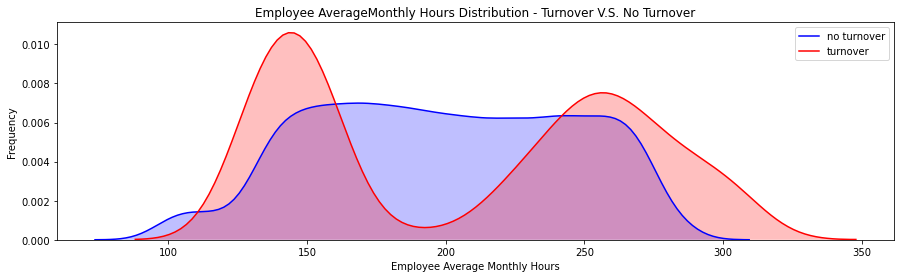

In [5]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

- yes
- make a deal with the people who tend to leave the company and arrange the employee average monthly hours around 150-250

<h2>Exercise 2</h2>

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

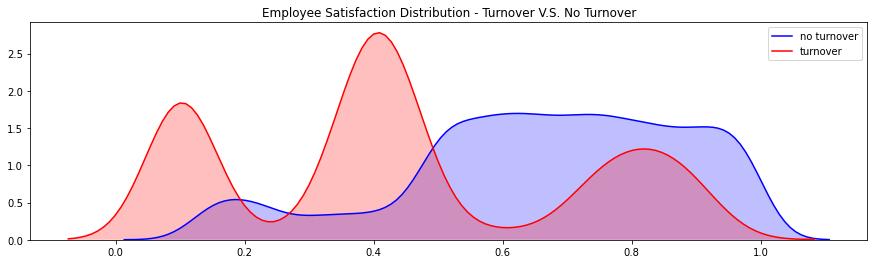

In [6]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] ,color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] ,color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

- medium satisfaction level
- yes

<h2>Exercise 3</h2>

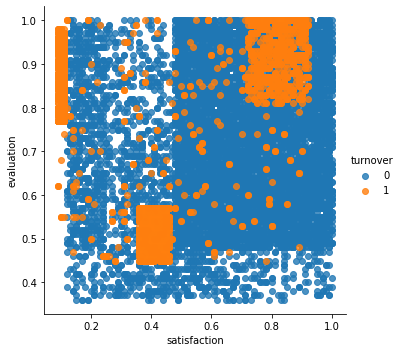

In [7]:
sns.lmplot(x='satisfaction', y='evaluation', data=df, fit_reg=False, hue='turnover')

- 3 clusters
- cluster which is evaluation equals to 0.85-1.00 and satisfaction equals to 0.7-0.9

<h2>Exercise 4</h2>

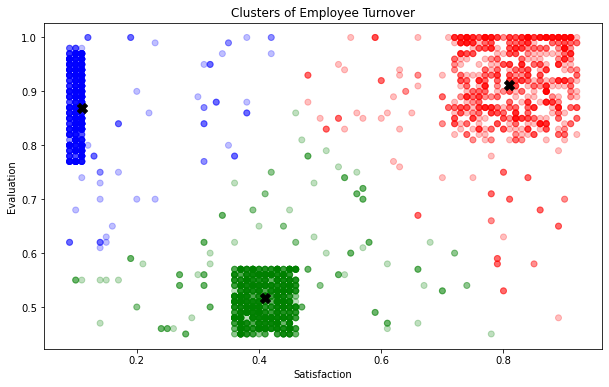

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])
kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]
fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1], alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

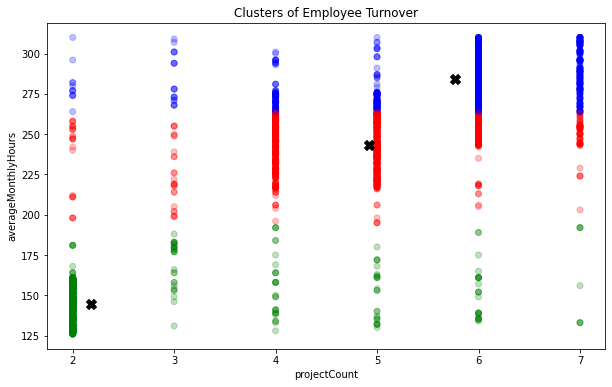

In [9]:
# project count V.S. average monthly hours

kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["projectCount","averageMonthlyHours"]])
kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]
fig = plt.figure(figsize=(10, 6))
plt.scatter(x="projectCount",y="averageMonthlyHours", data=df[df.turnover==1], alpha=0.25,color = kmeans_colors)
plt.xlabel("projectCount")
plt.ylabel("averageMonthlyHours")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

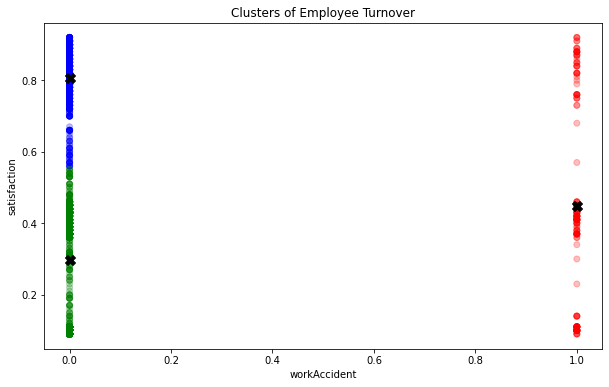

In [10]:
# work accident V.S. satisfaction

kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["workAccident","satisfaction"]])
kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]
fig = plt.figure(figsize=(10, 6))
plt.scatter(x="workAccident",y="satisfaction", data=df[df.turnover==1], alpha=0.25,color = kmeans_colors)
plt.xlabel("workAccident")
plt.ylabel("satisfaction")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

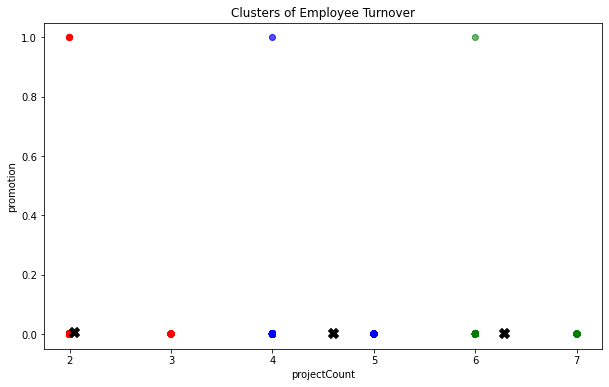

In [11]:
# project count V.S. promotion

kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["projectCount","promotion"]])
kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]
fig = plt.figure(figsize=(10, 6))
plt.scatter(x="projectCount",y="promotion", data=df[df.turnover==1], alpha=0.25,color = kmeans_colors)
plt.xlabel("projectCount")
plt.ylabel("promotion")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

<h2>Exercise 5</h2>

In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

In [13]:
# Convert these variables into categorical variables

df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

In [14]:
# Create train and test splits

target_name = 'turnover'
X = df.drop('turnover', axis=1)
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)
dtree = tree.DecisionTreeClassifier(max_depth=3, class_weight="balanced", min_weight_fraction_leaf=0.01)
dtree = dtree.fit(X_train,y_train)

<h2>Exercise 6</h2>

In [15]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(dtree, out_file = dotfile, feature_names = X.columns)
dotfile.close()

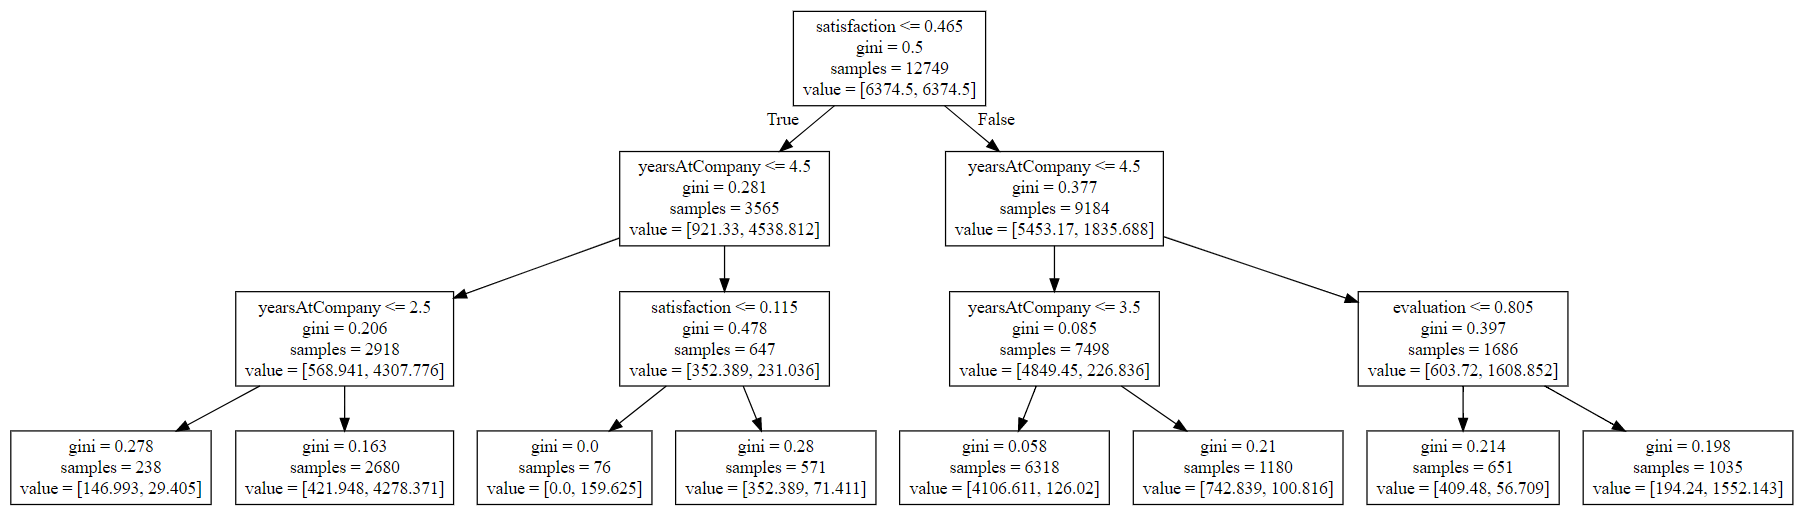

- summary of the data in the previous part. Including calculating gini coefficient (average income of entire populations) and sample of each condition.

<h2>Exercise 7</h2>

version 1

[Text(281.88, 306.18000000000006, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(187.92, 218.70000000000005, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(375.84, 218.70000000000005, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(187.92, 131.22000000000003, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(93.96, 43.74000000000001, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(281.88, 43.74000000000001, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(563.76, 131.22000000000003, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(469.79999999999995, 43.74000000000001, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(657.7199999999999, 43.74000000000001, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

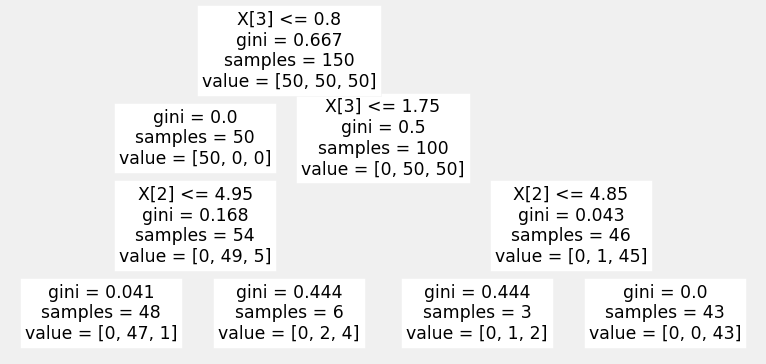

In [21]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

dtree = tree.DecisionTreeClassifier(max_depth=3, class_weight="balanced", min_weight_fraction_leaf=0.01)
iris = load_iris()
dtree = dtree.fit(iris.data, iris.target)
tree.plot_tree(dtree)

[Text(375.84, 314.92800000000005, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(307.50545454545454, 244.94400000000007, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(444.1745454545454, 244.94400000000007, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(273.3381818181818, 174.96000000000004, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(136.6690909090909, 104.97600000000006, 'X[0] <= 4.95\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(68.33454545454545, 34.99200000000002, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(205.00363636363636, 34.99200000000002, 'gini = 0.0\nsamples = 46\nvalue = [0, 46, 0]'),
 Text(410.0072727272727, 104.97600000000006, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(341.67272727272723, 34.99200000000002, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(478.34181818181816, 34.99200000000002, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 

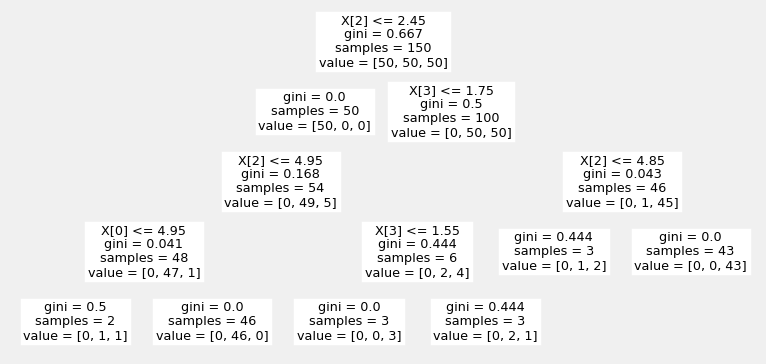

In [22]:
dtree = tree.DecisionTreeClassifier(max_depth=5, class_weight="balanced", min_weight_fraction_leaf=0.01)
iris = load_iris()
dtree = dtree.fit(iris.data, iris.target)
tree.plot_tree(dtree)

version 2

In [19]:
dot_data = StringIO()
dtree = tree.DecisionTreeClassifier(max_depth=3, class_weight="balanced", min_weight_fraction_leaf=0.01)
dtree = dtree.fit(X_train, y_train)
export_graphviz(dtree, out_file=dot_data,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(dtree, out_file = dotfile, feature_names = X.columns)
dotfile.close()

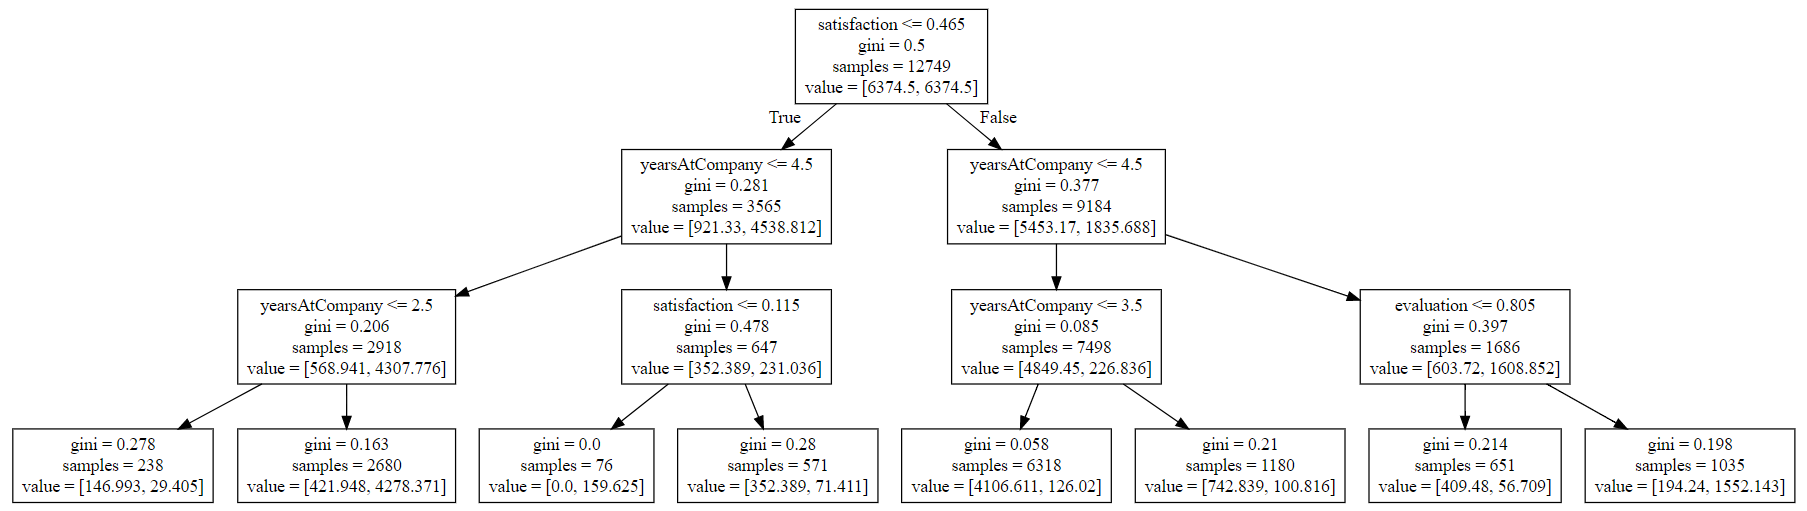

In [20]:
dot_data = StringIO()
dtree = tree.DecisionTreeClassifier(max_depth=5, class_weight="balanced", min_weight_fraction_leaf=0.01)
dtree = dtree.fit(X_train, y_train)
export_graphviz(dtree, out_file=dot_data,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(dtree, out_file = dotfile, feature_names = X.columns)
dotfile.close()

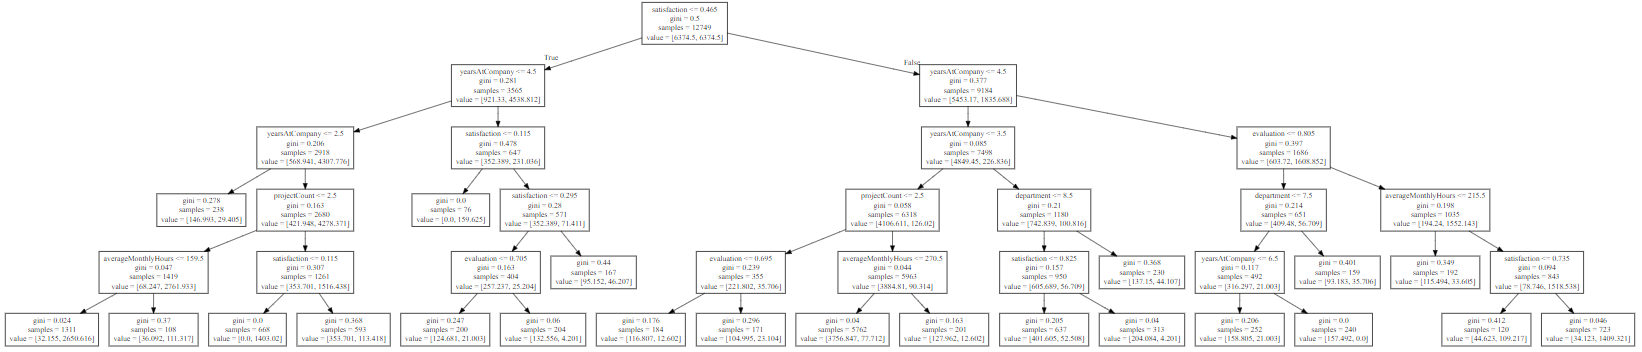